# 0. Magic Commands


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล

ใช้ชุดข้อมูล Dataset พันธุ์หมาแมว [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf)

In [3]:
path = untar_data(URLs.PETS)
path_images = path/'images'
filenames = get_image_files(path_images)

# 3. เตรียมข้อมูล

เพื่อความสะดวก เราจะประกาศฟังก์ชัน แล้วไปเรียกสร้างก่อน fit ด้วย Batch Size แต่ละแบบ

In [4]:
batchsize = 64
epoch = 16
np.random.seed(55)
regex_pattern = r'/([^/]+)_\d+.jpg$'

def get_databunch():
    return ImageDataBunch.from_name_re(path_images, filenames, 
                                   regex_pattern, ds_tfms=get_transforms(), 
                                   size=224, bs=batchsize).normalize(imagenet_stats)

# 4. สร้างโมเดล

เพื่อความสะดวก เราจะประกาศฟังก์ชัน แล้วไปเรียกสร้างก่อน fit ด้วย Batch Size แต่ละแบบ

* เคสนี้เราจะใช้โมเดล models.resnet18
* pretrained=False หมายถึง เราจะเริ่มเทรนตั้งแต่ต้น ไม่เอา Weight ที่เคยเทรนกับ ImageNet มาแล้วมาใช้

In [5]:
def get_learner(databunch):
    return cnn_learner(databunch, models.resnet34, 
                      pretrained=False, 
                      metrics=accuracy, callback_fns=ShowGraph).to_fp16()

# 5. เริ่มต้นเทรนโมเดล

ปกติ Batch Size จะมีค่า Default เท่ากับ 64 เราจะลองเทรนด้วย Batch Size สูงมาก และต่ำมาก เปรียบเทียบกับ [Image Classification ep.3](https://www.bualabs.com/archives/509/mnist-fastai-resnet18-image-classification-ep-3/) ดูว่าจะเป็นอย่างไร

## ลองเทรนด้วย Batch Size ใหญ่ ๆ เช่น 512

epoch,train_loss,valid_loss,accuracy,time
0,4.085912,3.619946,0.025710,00:38
1,4.017074,3.739358,0.029770,00:32
2,3.936802,3.580284,0.054804,00:31
3,3.861853,3.742437,0.078484,00:32
4,3.779713,3.528949,0.087957,00:31
5,3.699931,3.480061,0.105548,00:31
6,3.608214,3.517358,0.103518,00:31
7,3.519160,3.111308,0.150203,00:31
8,3.435261,3.078667,0.173207,00:32
9,3.356390,3.039001,0.180650,00:31


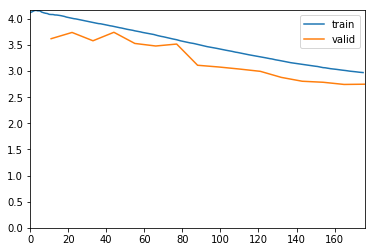

In [6]:
batchsize = 512

learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

ใช้เวลาไม่ถึง 5 นาที ได้ Accuracy 15%

## ลองเทรนด้วย Batch Size เล็ก ๆ เช่น 2

epoch,train_loss,valid_loss,accuracy,time
0,3.969953,3.996136,0.030447,02:05
1,3.707931,4.420848,0.035859,02:05
2,3.792699,3.850158,0.031800,02:06
3,3.718220,3.709203,0.027064,02:06
4,3.770127,4.841862,0.029770,02:07
5,3.803670,3.856462,0.024357,02:07
6,3.732862,14.417171,0.018945,02:06
7,3.729589,6.843073,0.028417,02:07
8,3.723583,16.385988,0.033829,02:06
9,3.674579,4.618607,0.020298,02:07


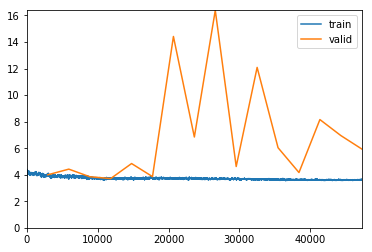

In [7]:
batchsize = 2

learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

เทรนช้า


## ลองเทรนด้วย Default Batch Size 64

epoch,train_loss,valid_loss,accuracy,time
0,3.995734,3.619972,0.046008,00:27
1,3.833632,3.508620,0.066982,00:26
2,3.675038,3.451895,0.092693,00:26
3,3.492510,3.457355,0.106901,00:26
4,3.331289,3.233011,0.119756,00:26
5,3.135010,3.609682,0.131258,00:26
6,2.900362,2.995388,0.198241,00:26
7,2.714473,2.780990,0.248985,00:26
8,2.503539,2.503282,0.291610,00:26
9,2.283386,2.259569,0.325440,00:26


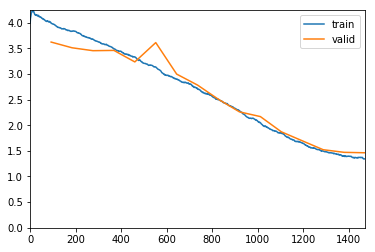

In [8]:
batchsize = 64

learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

## ลองเทรนด้วย Batch Size 32 ตาม Paper

epoch,train_loss,valid_loss,accuracy,time
0,3.944496,3.593606,0.054127,00:28
1,3.762694,3.522297,0.077131,00:27
2,3.584366,3.549043,0.066982,00:27
3,3.436313,3.282166,0.131935,00:27
4,3.231786,3.045166,0.161705,00:27
5,3.037077,4.495925,0.083897,00:27
6,2.824128,2.914980,0.218539,00:27
7,2.576104,2.421703,0.293640,00:27
8,2.376028,2.338658,0.293640,00:27
9,2.162715,1.937695,0.411367,00:27


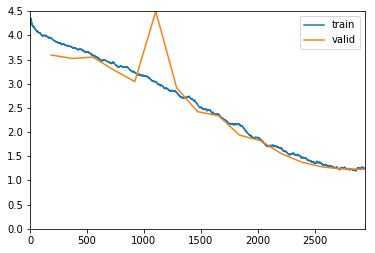

In [9]:
batchsize = 32

learner = get_learner(get_databunch())
learner.fit_one_cycle(epoch)

# 6. สรุป

# Credit 

* [The “BS<=32” paper Topic on Fastai Forum](https://forums.fast.ai/t/the-bs-32-paper/38935)
* [Revisiting Small Batch Training for Deep Neural Networks Dominic Masters, Carlo Luschi (Submitted on 20 Apr 2018)](https://arxiv.org/abs/1804.07612)
* [Yann LeCun on Twitter: "Training with large minibatches is bad for ...](https://twitter.com/ylecun/status/989610208497360896)